In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [42]:
df_M = pd.read_csv('유아용품/Member_data2.csv')
df_S = pd.read_csv('유아용품/new_sales4.csv', encoding = "euc-kr")
df_P = pd.read_csv('유아용품/new_product3.csv', encoding = "euc-kr")

In [43]:
df_first = pd.merge(df_M, df_S, on = ['고객번호'], how = 'right')
df_first

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37
1,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26
2,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,5610,3800,티슈,크리넥스？키즈용？화장지？3겹？27m 8롤,1.000000,201902,0.32
3,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19
4,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199511,201912281058006,여,기혼,충남,34.0,우리은행,검색광고,Yes,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00
199512,201912281058007,여,기혼,대전,29.0,농협회원조합,인스타그램,Yes,201912283245128,2019-12-29,2019-12-30,2020-01-01,NaN,65880,52065,아이_생활용품,하기스 매직핏 꿀벅지 아기용 기저귀 3단계 공용 198매(밴드형),1.000000,201912,0.21
199513,201912281058011,여,기혼,충북,31.0,국민은행,인스타그램,Yes,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21
199514,201912281058012,여,기혼,서울,30.0,농협중앙회,인스타그램,No,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00


In [4]:
df = pd.DataFrame(df_first[['고객번호', '구매일','물품대분류']]) ;df.reset_index(drop = True)
recency = df.drop_duplicates(['고객번호'], keep = 'first')
recency

,고객번호,구매일,물품대분류
0,201812310749735,2019-05-06,수유용품
2,201812310749770,2019-02-28,티슈
3,201812310749771,2019-05-13,3단계
4,201812310749774,2019-05-10,3단계
6,201812310749780,2019-01-30,이벤트
...,...,...,...
199509,201912281058004,2019-12-29,이벤트
199510,201912281058006,2019-12-29,이벤트
199512,201912281058007,2019-12-29,아이_생활용품
199513,201912281058011,2020-04-10,이벤트


<AxesSubplot:xlabel='물품대분류', ylabel='count'>

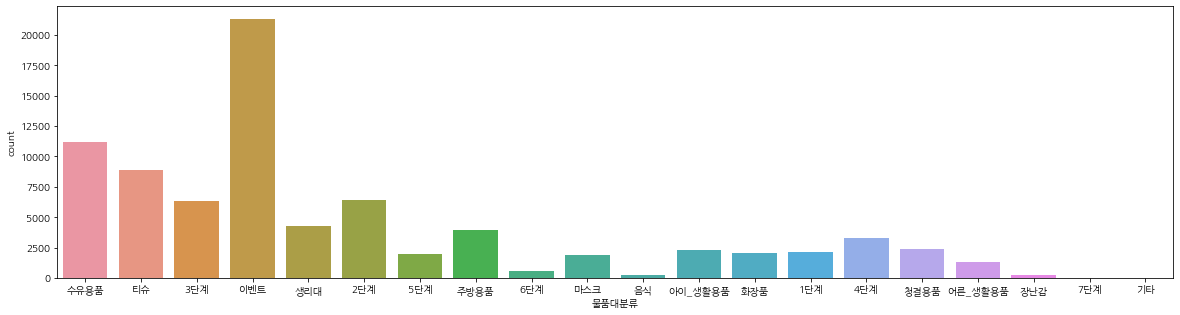

In [5]:
plt.figure(figsize = (20, 5))
sns.countplot(x='물품대분류', data = recency)

In [44]:
df_grouped = copy.deepcopy(recency)

recency['물품대분류'] = recency['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)


C:\Users\LG\AppData\Local\Temp/ipykernel_14328/3792163178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency['물품대분류'] = recency['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)


In [45]:
recency.head()

,고객번호,구매일,물품대분류,기저귀
0,201812310749735,2019-05-06,수유용품,수유용품
2,201812310749770,2019-02-28,티슈,티슈
3,201812310749771,2019-05-13,기저귀,기저귀
4,201812310749774,2019-05-10,기저귀,기저귀
6,201812310749780,2019-01-30,이벤트,이벤트


In [51]:
temp_recency = recency['물품대분류'].value_counts(sort = True).iloc[:5]
temp_recency = temp_recency.reset_index()
temp_recency

,index,물품대분류
0,이벤트,21287
1,기저귀,20877
2,수유용품,11160
3,티슈,8909
4,생리대,4310


<AxesSubplot:xlabel='index', ylabel='물품대분류'>

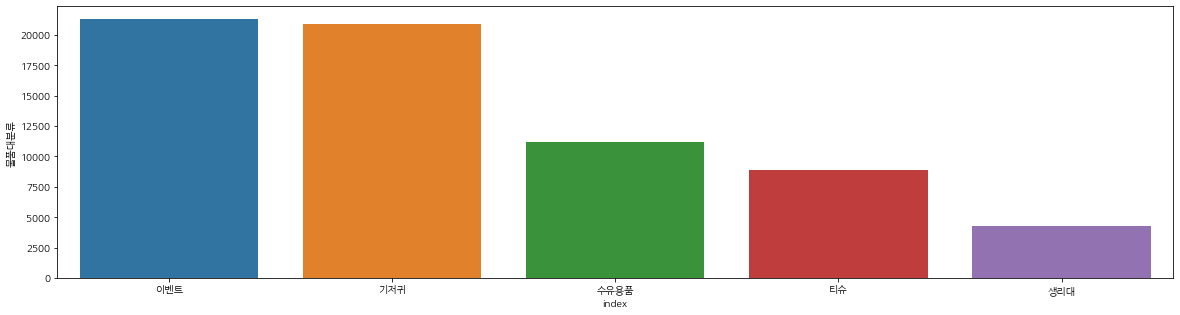

In [53]:
plt.figure(figsize = (20, 5))
sns.barplot(x='index', y='물품대분류', data = temp_recency)